
# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

This notebook outlines descriptive analytics and data preprocessing steps performed on the sales and discounts dataset.
It includes basic statistical measures, visualizations, standardization, and conversion of categorical variables using one-hot encoding.



## Descriptive Analytics for Numerical Columns

The following descriptive statistics summarize key metrics like the mean, median, mode, and standard deviation for numerical columns in the dataset.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'sales_data_with_discounts.csv'
df = pd.read_csv(file_path)

# Descriptive statistics
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
statistics = df[numerical_cols].describe()
mean_values = df[numerical_cols].mean()
median_values = df[numerical_cols].median()
mode_values = df[numerical_cols].mode().iloc[0]
std_dev_values = df[numerical_cols].std()

print("Mean values:", mean_values)
print("Median values:", median_values)
print("Mode values:", mode_values)
print("Standard Deviation values:", std_dev_values)

statistics


Mean values: Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median values: Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode values: Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation values: Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049



## Data Visualization

Histograms and boxplots are useful to analyze the distribution of numerical data, while bar charts can be used for categorical data. 
Below are the visualizations for the numerical columns.


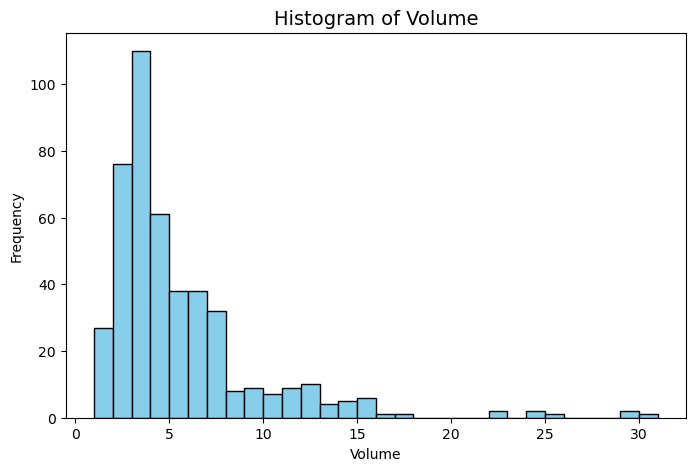

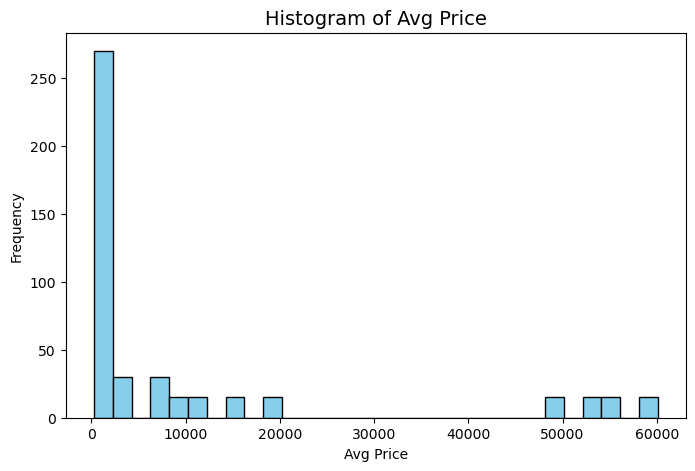

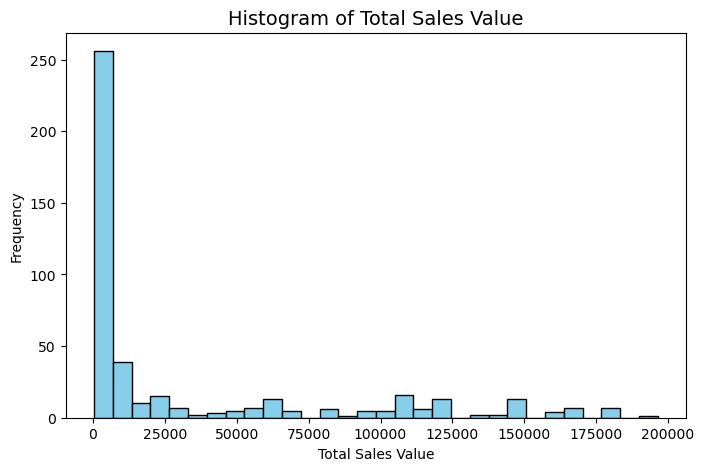

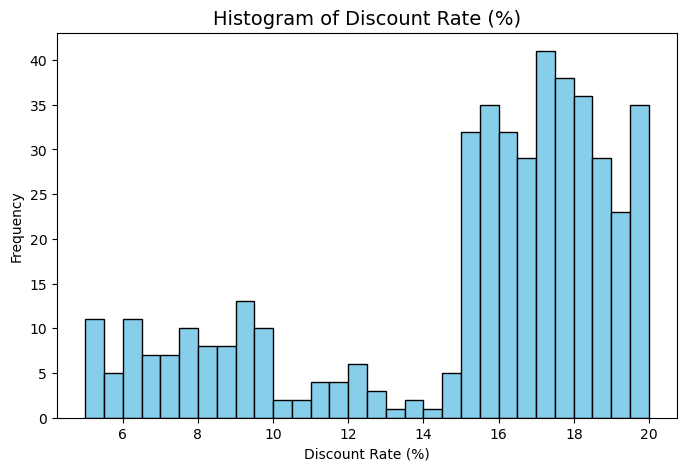

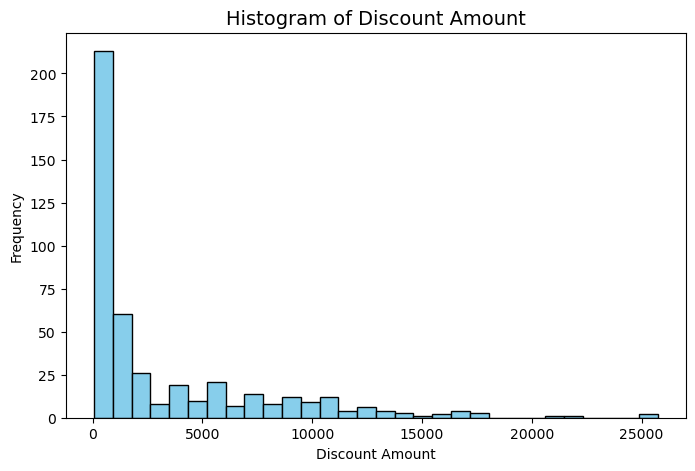

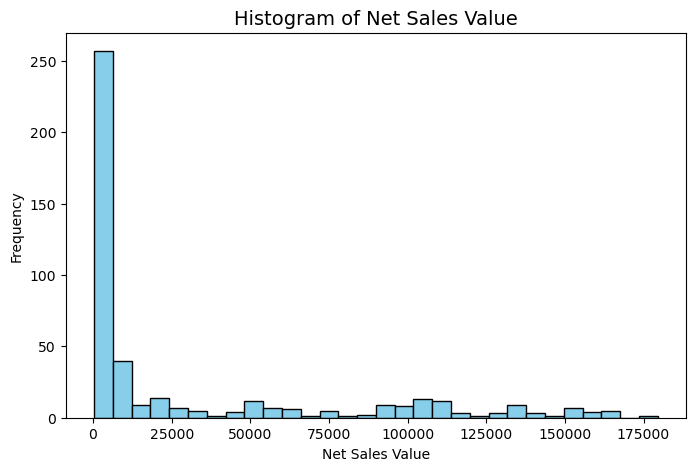

In [3]:

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


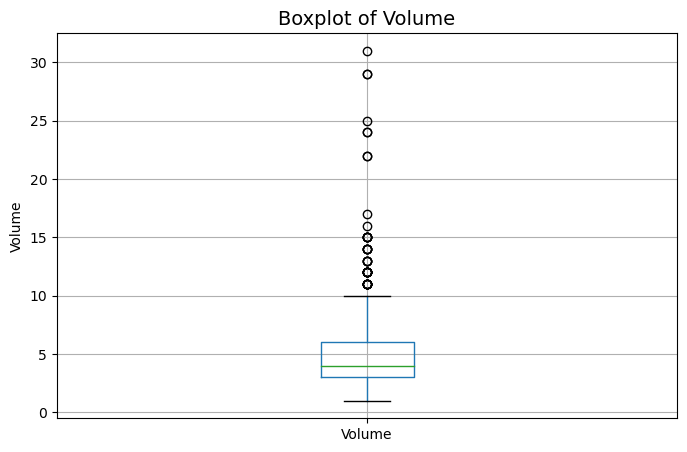

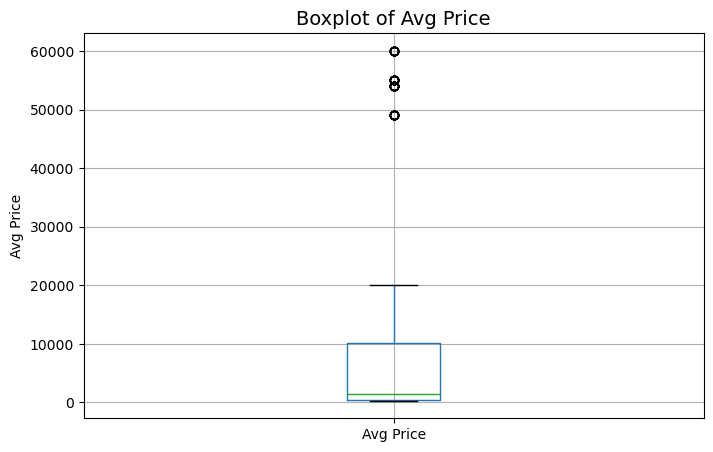

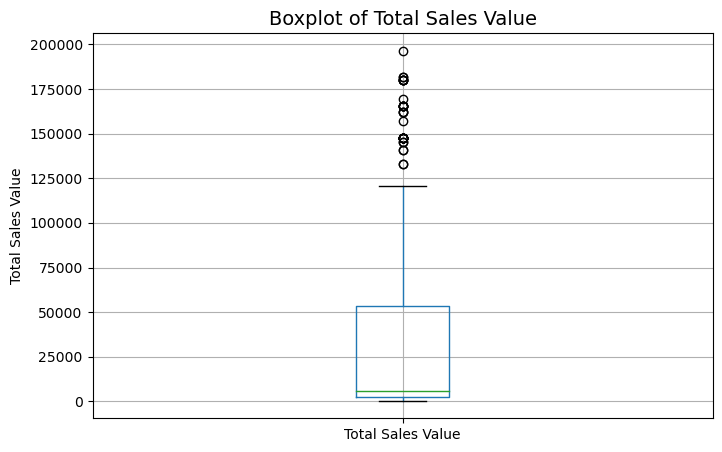

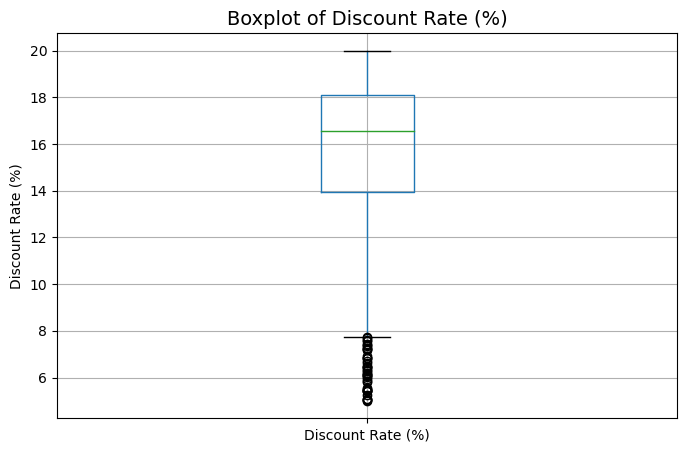

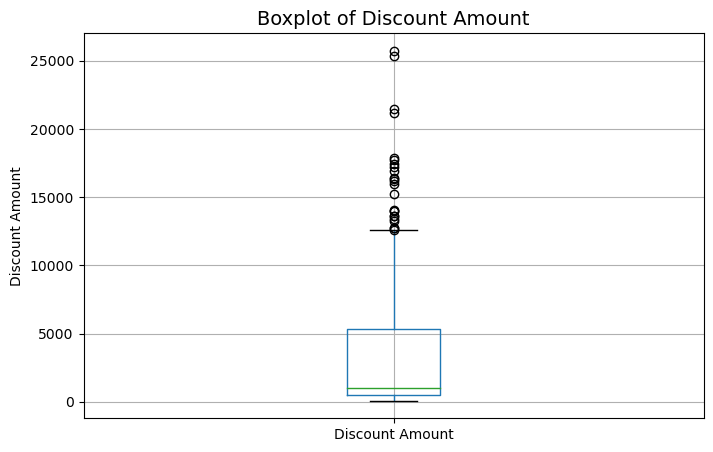

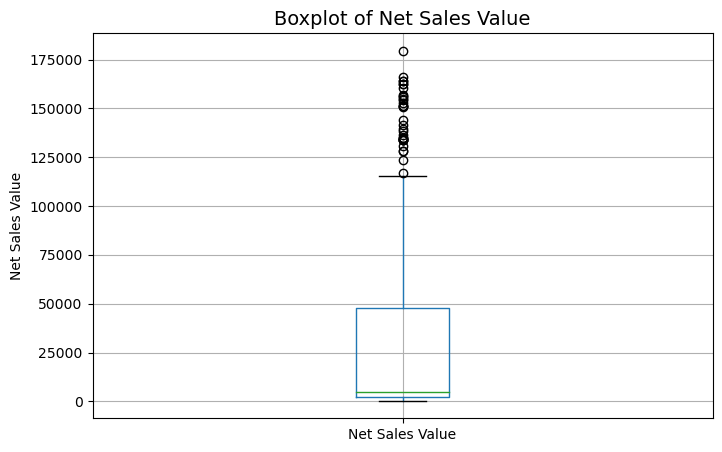

In [4]:

# Plot boxplots for numerical columns to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col)
    plt.show()



## Standardization of Numerical Variables

Standardization (z-score normalization) was applied to numerical columns. The data was transformed so that each 
numerical feature has a mean of 0 and a standard deviation of 1, making it easier for machine learning algorithms 
to process the data uniformly.


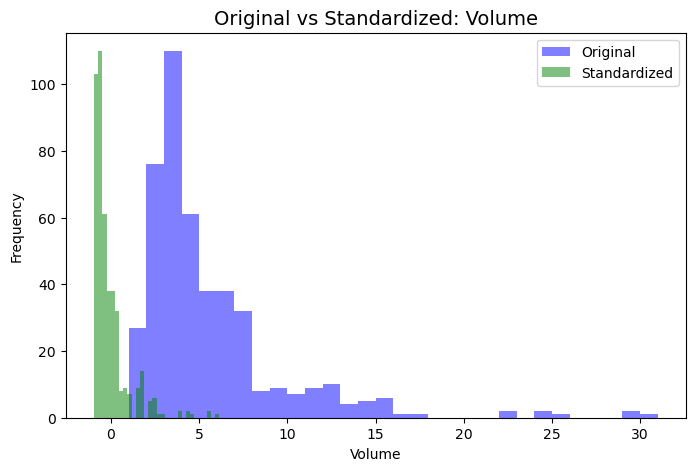

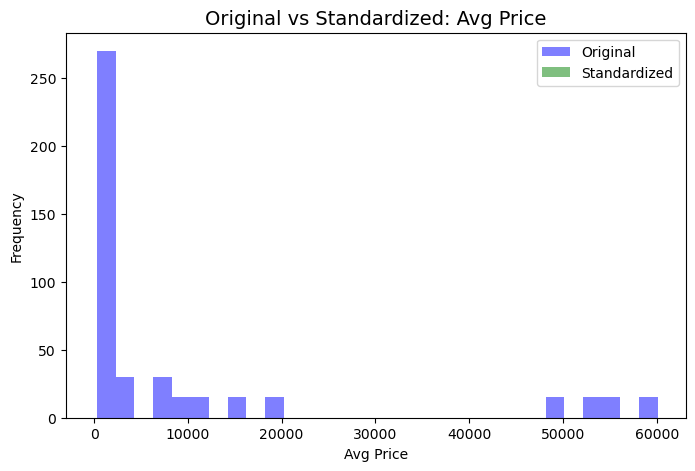

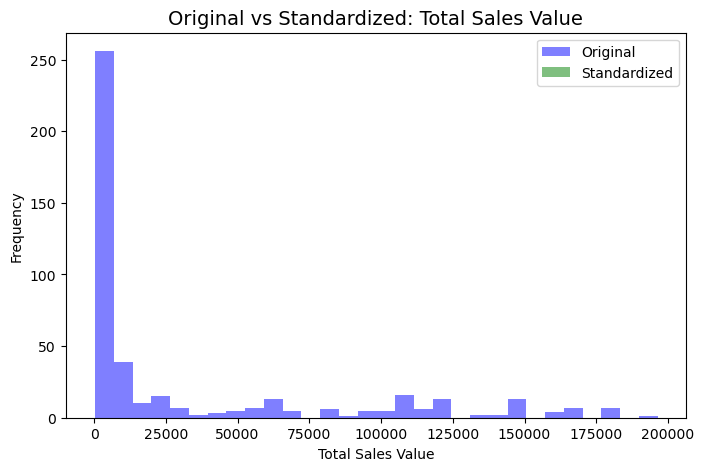

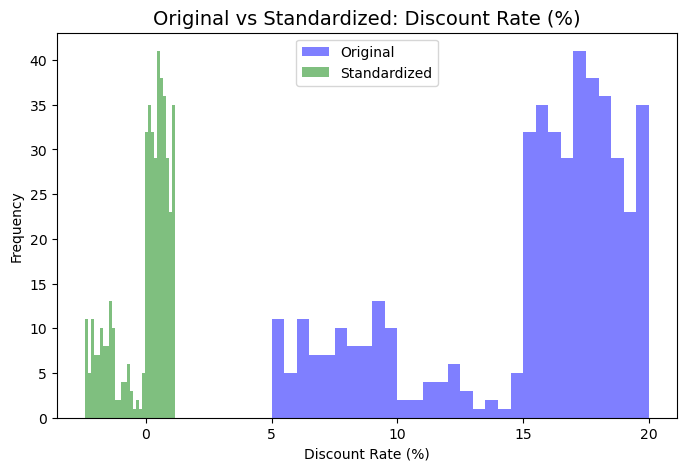

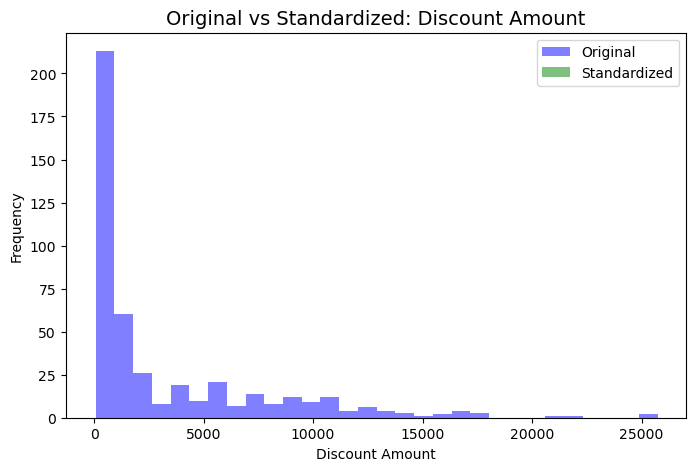

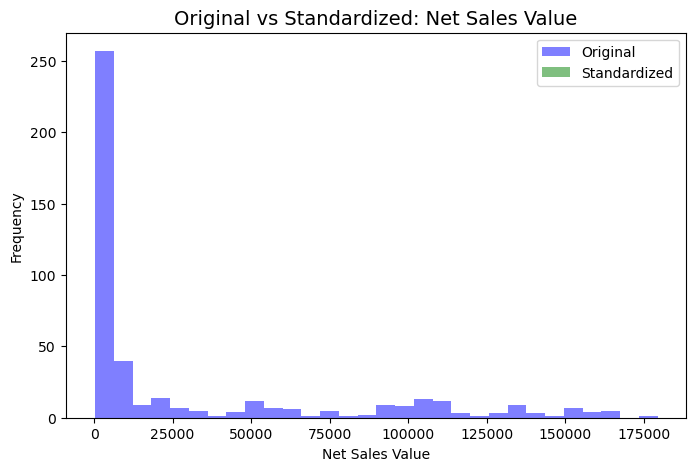

In [5]:

# Standardizing numerical variables using z-score normalization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Plot original vs standardized histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, alpha=0.5, label='Original', color='blue')
    plt.hist(df_standardized[col], bins=30, alpha=0.5, label='Standardized', color='green')
    plt.title(f'Original vs Standardized: {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(False)
    plt.show()



## Conversion of Categorical Data into Dummy Variables

Categorical variables were transformed into binary columns using one-hot encoding, which allows machine learning models to interpret non-numerical data.


In [6]:

# One-hot encoding categorical variables
categorical_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()


,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,...,0,0,0,0,0,0,0,1,0,0



## Conclusion

This notebook provides a comprehensive analysis of the sales and discounts data. The descriptive statistics, 
data visualizations, and preprocessing steps prepare the data for further analysis and machine learning modeling.
